In [99]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('/home/svcl-oowl/brandon/research/CVPR_2021_REFINE/sil_consistent_at_inference')
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/svcl-oowl/brandon/research/CVPR_2021_REFINE/sil_consistent_at_inference


In [100]:
import pprint
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
vals = [
    [0.1, 0.19], 
    [0.1, 0.19], 
    [0.99,0.99],
    [0.99,0.99],
    [0.99,0.99],
    ]

In [168]:
u = 0.9
o=0
vals = [
    [0.165, 0.3], 
    [u,u+o],
    [u,u+o],
    [u,u+o],
    [u,u+o],
    [u,u+o],
    [u,u+o],
    ]

print("Average Percent Change\n")
average_percent_change = 0
for (before, after) in vals:
    pc = 100*((after-before)/before)
    print("{} -> {}, pc: {}".format(before, after, pc))
    average_percent_change += pc
average_percent_change = average_percent_change / len(vals)
print("Average Percent Change: {}".format(average_percent_change))

print("\n=================================================================")
print("percent change of averaged\n")

percent_change_of_averaged = 0
avg_before = sum([v[0] for v in vals])/len(vals)
avg_after = sum([v[1] for v in vals])/len(vals)
print("Avg before: {}".format(avg_before))
print("Avg after: {}".format(avg_after))
print("Percent Change of Average: {}".format(100*((avg_after-avg_before)/avg_before)))


Average Percent Change

0.165 -> 0.3, pc: 81.8181818181818
0.9 -> 0.9, pc: 0.0
0.9 -> 0.9, pc: 0.0
0.9 -> 0.9, pc: 0.0
0.9 -> 0.9, pc: 0.0
0.9 -> 0.9, pc: 0.0
0.9 -> 0.9, pc: 0.0
Average Percent Change: 11.688311688311686

percent change of averaged

Avg before: 0.795
Avg after: 0.8142857142857143
Percent Change of Average: 2.425876010781665


In [171]:
82/7

11.714285714285714

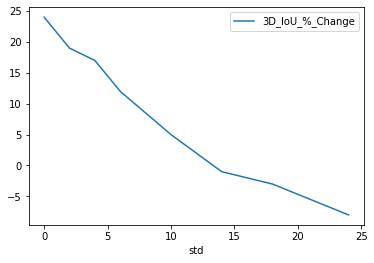

In [10]:
# 1st experiment: robustness to noisy pose

pose_std_df = pd.DataFrame()
pose_std_df = pose_std_df.append({"std":0, "3D_IoU_%_Change":24}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":2, "3D_IoU_%_Change":19}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":4, "3D_IoU_%_Change":17}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":6, "3D_IoU_%_Change":12}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":10, "3D_IoU_%_Change":5}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":14, "3D_IoU_%_Change":-1}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":18, "3D_IoU_%_Change":-3}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":24, "3D_IoU_%_Change":-8}, ignore_index=True)
pose_std_df.plot.line(x="std", y="3D_IoU_%_Change")

[Text(0, 0, '-5.0°'),
 Text(0, 0, '0.0°'),
 Text(0, 0, '5.0°'),
 Text(0, 0, '10.0°'),
 Text(0, 0, '15.0°'),
 Text(0, 0, '20.0°'),
 Text(0, 0, '25.0°'),
 Text(0, 0, '30.0°'),
 Text(0, 0, '35.0°'),
 Text(0, 0, '40.0°'),
 Text(0, 0, '45.0°')]

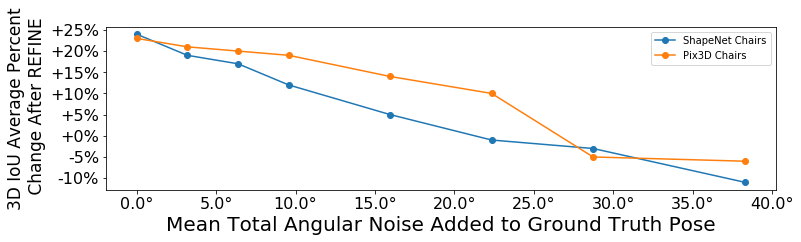

In [18]:
# 1st experiment: robustness to noisy pose
pose_std_df = pd.DataFrame()

pose_std_df = pose_std_df.append({"std":0, "ShapeNet Chairs":24}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":get_folded_norm_mean(2)*2, "ShapeNet Chairs":19}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":get_folded_norm_mean(4)*2, "ShapeNet Chairs":17}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":get_folded_norm_mean(6)*2, "ShapeNet Chairs":12}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":get_folded_norm_mean(10)*2, "ShapeNet Chairs":5}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":get_folded_norm_mean(14)*2, "ShapeNet Chairs":-1}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":get_folded_norm_mean(18)*2, "ShapeNet Chairs":-3}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":get_folded_norm_mean(24)*2, "ShapeNet Chairs":-11}, ignore_index=True)

pose_std_df = pose_std_df.append({"std":0, "Pix3D Chairs":23}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":get_folded_norm_mean(2)*2, "Pix3D Chairs":21}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":get_folded_norm_mean(4)*2, "Pix3D Chairs":20}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":get_folded_norm_mean(6)*2, "Pix3D Chairs":19}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":get_folded_norm_mean(10)*2, "Pix3D Chairs":14}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":get_folded_norm_mean(14)*2, "Pix3D Chairs":10}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":get_folded_norm_mean(18)*2, "Pix3D Chairs":-5}, ignore_index=True)
pose_std_df = pose_std_df.append({"std":get_folded_norm_mean(24)*2, "Pix3D Chairs":-6}, ignore_index=True)

ax = pose_std_df.plot.line(x="std", fontsize=16, figsize=(12*1,3*1), marker='o')

plt.xlabel("Mean Total Angular Noise Added to Ground Truth Pose", fontsize=20)
plt.ylabel("3D IoU Average Percent\n Change After REFINE", fontsize=17)

# setting y axis to be percent labels
y_vals = ax.get_yticks()
new_y_vals = []
for y_val in y_vals:
    new_y_val = str(y_val)
    new_y_val = new_y_val.replace(".0","")
    if new_y_val[0]!="-":
        new_y_val = '+' + new_y_val
    new_y_val = new_y_val + "%"
    new_y_vals.append(new_y_val)
ax.set_yticklabels(new_y_vals)

# setting x axis to be degrees
x_vals = ax.get_xticks()
ax.set_xticklabels([str(x_val)+"°" for x_val in x_vals])

In [3]:
import scipy.stats

def get_folded_norm_mean(sigma, mu=0):
    norm = scipy.stats.norm()
    mean = sigma * np.sqrt(2/np.pi) * np.exp(-(mu**2)/(2*sigma**2)) + mu*(1-2*norm.cdf(-mu/sigma))
    return mean

In [27]:
for std in [2,4,6,10,14,18,24]:
    print("std: {}, expected val: {}".format(std, get_folded_norm_mean(std,0)))
    

std: 2, expected val: 1.5957691216057308
std: 4, expected val: 3.1915382432114616
std: 6, expected val: 4.787307364817193
std: 10, expected val: 7.978845608028654
std: 14, expected val: 11.170383851240116
std: 18, expected val: 14.361922094451577
std: 24, expected val: 19.14922945926877


In [4]:
(0.3+0.9*6)/7

0.8142857142857143